#Linear regression single variable

```
y = mx + c
```



In [ ]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

In [ ]:
#reading the data 
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/homeprices.csv")

In [ ]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


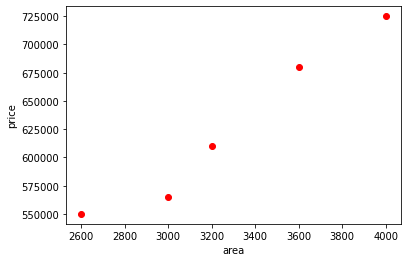

In [ ]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='red')

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.predict([[3300]])

array([628715.75342466])

In [ ]:
reg.coef_  #Nothing but it represents the slop

array([135.78767123])

In [ ]:
reg.intercept_ #nothing but it represent intercept or we can say as bias 

180616.43835616432

In [ ]:
#so basically it works on y = mx + c for this example we have (m = 135.78767123, c = 180616.43835616432)
135.78767123*3300 + 180616.43835616432

628715.7534151643

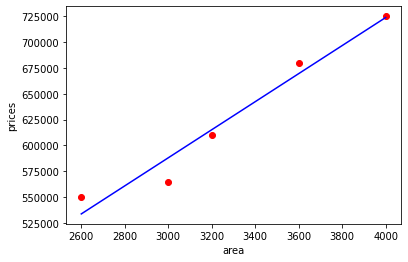

In [ ]:
plt.xlabel('area')
plt.ylabel('prices')
plt.scatter(df.area, df.price, color='red')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/areas.csv")
data.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [ ]:
data_predict = reg.predict(data)

In [ ]:
data['price'] = data_predict
data

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


Exercise

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv")

In [ ]:
dataset.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


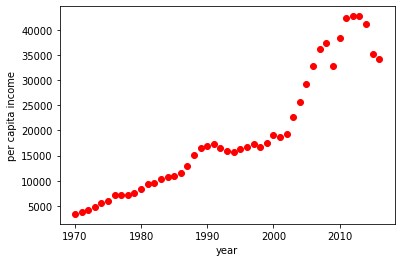

In [ ]:
plt.xlabel('year')
plt.ylabel('per capita income')
plt.scatter(dataset.iloc[:,0], dataset.iloc[:,-1], color = 'red')

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(dataset[['year']], dataset.iloc[:,-1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.predict([[2021]])

array([42117.15916964])

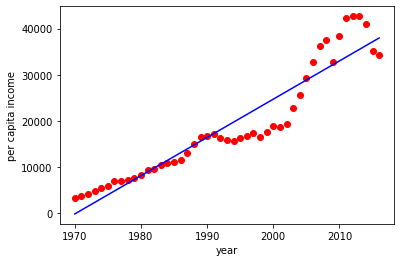

In [ ]:
plt.xlabel('year')
plt.ylabel('per capita income')
plt.scatter(dataset.iloc[:,0], dataset.iloc[:,-1], color = 'red')
plt.plot(dataset.iloc[:,0], reg.predict(dataset[['year']]), color='blue')

#linear regression with multiple variables 

In [ ]:
#modules are already imported above 

#now reading the data
dataset1 = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/homeprices.csv')

In [ ]:
dataset1

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In machine learning null values creates problem in other words missing values will effect the model to be trained so first we will have to deal with that

we can do this by either removing the line having the missing values or either we can fill the missing value which tottally depends upon the dataset

In [ ]:
import math 

median_bedroom = math.floor(dataset1.bedrooms.median())
median_bedroom

4

In [ ]:
dataset1.bedrooms = dataset1.bedrooms.fillna(median_bedroom) 
dataset1

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
reg1 = linear_model.LinearRegression()
reg1.fit(dataset1[['area', 'bedrooms', 'age']], dataset1.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg1.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [ ]:
reg1.intercept_

221323.00186540396

In [ ]:
reg1.predict([[3000, 3, 40]])

array([498408.25158031])

In [ ]:
# y = m1*x1 + m2*x2 + m3*x3 ... + c

112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540396

498408.251574024

In [ ]:
reg1.predict([[2500, 4, 5]])

array([578876.03748933])

Exercise

In [ ]:
df2 = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv")
df2

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
#cleaning the dataset

#first of all we need to convert the words into the number in experience 
#we can use word2number for that purpose
!pip install word2number

In [ ]:
from word2number import w2n
df2.experience = df2.experience.fillna('zero')

In [ ]:
df2.experience = df2.experience.apply(w2n.word_to_num)
df2

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [ ]:
median_test = math.floor(df2['test_score(out of 10)'].median())
median_test

8

In [ ]:
df2['test_score(out of 10)'] = df2['test_score(out of 10)'].fillna(median_test)

In [ ]:
df2

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [ ]:
reg2 = linear_model.LinearRegression()
reg2.fit(df2[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], df2['salary($)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg2.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [ ]:
reg2.intercept_

17737.263464337702

In [ ]:
reg2.predict([[2, 9, 6]])

array([53205.96797671])

In [ ]:
reg2.predict([[12, 10, 10]])

array([92002.18340611])